In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns           # Easier matplotlib

In [2]:
df = pd.read_csv(os.path.join('..','data','raw','Mens-Volleyball-PlusLiga-2008-2023.csv'), sep=',')
df.head()

,Date,Team_1,Team_2,T1_Score,T2_Score,T1_Sum,T1_BP,T1_Ratio,T1_Srv_Sum,T1_Srv_Err,...,T2_Rec_Perf,T2_Att_Sum,T2_Att_Err,T2_Att_Blk,T2_Att_Kill,T2_Att_Kill_Perc,T2_Att_Eff,T2_Blk_Sum,T2_Blk_As,Winner
0,"01.10.2022, 14:45",AZS Olsztyn,ZAKSA Kędzierzyn-Koźle,1,3,60.0,17.0,11.0,79.0,18,...,26%,88,7,7,45,51%,35%,14,11,1
1,"30.09.2022, 17:30",Jastrzębski Węgiel,GKS Katowice,3,0,51.0,17.0,27.0,77.0,15,...,20%,91,8,4,43,47%,34%,1,17,0
2,"01.10.2022, 20:30",LUK Lublin,Czarni Radom,2,3,76.0,23.0,35.0,109.0,16,...,18%,128,10,10,63,49%,33%,10,13,1
3,"02.10.2022, 14:45",Warta Zawiercie,PGE Skra Bełchatów,3,2,66.0,16.0,22.0,98.0,21,...,9%,102,9,9,56,54%,37%,7,14,0
4,"03.10.2022, 17:30",BBTS Bielsko-Biała,Cuprum Lubin,1,3,63.0,22.0,17.0,100.0,19,...,22%,109,7,8,58,53%,39%,10,10,1


<big> Basics explorations <big>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              2639 non-null   object 
 1   Team_1            2639 non-null   object 
 2   Team_2            2639 non-null   object 
 3   T1_Score          2639 non-null   int64  
 4   T2_Score          2639 non-null   int64  
 5   T1_Sum            2639 non-null   float64
 6   T1_BP             2639 non-null   float64
 7   T1_Ratio          2639 non-null   float64
 8   T1_Srv_Sum        2639 non-null   float64
 9   T1_Srv_Err        2639 non-null   object 
 10  T1_Srv_Ace        2639 non-null   float64
 11  T1_Srv_Eff        2639 non-null   object 
 12  T1_Rec_Sum        2639 non-null   float64
 13  T1_Rec_Err        2639 non-null   float64
 14  T1_Rec_Pos        2639 non-null   object 
 15  T1_Rec_Perf       2639 non-null   object 
 16  T1_Att_Sum        2639 non-null   object 


In [4]:
df.describe()   # Mean, odchylenie standardowe, min, max, kwartyle

,T1_Score,T2_Score,T1_Sum,T1_BP,T1_Ratio,T1_Srv_Sum,T1_Srv_Ace,T1_Rec_Sum,T1_Rec_Err,T1_Att_Err,...,T2_Ratio,T2_Srv_Sum,T2_Srv_Ace,T2_Rec_Sum,T2_Rec_Err,T2_Att_Err,T2_Att_Blk,T2_Att_Kill,T2_Blk_Sum,Winner
count,2639.000000,2639.000000,2639.000000,2639.000000,2639.000000,2639.000000,2639.000000,2639.000000,2639.000000,2639.000000,...,2639.000000,2639.000000,2639.000000,2639.000000,2639.000000,2639.000000,2639.000000,2639.000000,2639.000000,2639.000000
mean,2.042061,1.779841,61.737401,70.758242,10.257673,31.056461,54.813945,29.942023,28.399015,77.294051,...,9.649488,30.936718,56.054566,30.857522,28.355059,77.660856,7.697234,18.380826,8.599469,0.457749
std,1.176007,1.258043,13.114343,31.119032,11.168650,31.582861,31.011209,23.861635,15.768593,44.164512,...,11.030401,31.312134,31.217354,23.759571,15.457054,44.239893,3.284414,17.348043,3.747308,0.498306
min,0.000000,0.000000,22.000000,2.000000,-10.000000,3.000000,0.000000,1.000000,0.000000,0.000000,...,-9.000000,3.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,53.000000,53.000000,3.000000,12.000000,38.500000,14.000000,17.500000,60.000000,...,3.000000,12.000000,41.000000,15.000000,18.000000,60.000000,5.000000,8.000000,6.000000,0.000000
50%,3.000000,2.000000,62.000000,74.000000,6.000000,16.000000,63.000000,20.000000,31.000000,87.000000,...,5.000000,16.000000,64.000000,21.000000,31.000000,87.000000,7.000000,11.000000,8.000000,0.000000
75%,3.000000,3.000000,72.000000,97.000000,10.000000,25.000000,81.000000,35.000000,40.000000,111.000000,...,9.000000,24.000000,81.000000,35.000000,40.000000,112.000000,10.000000,18.000000,11.000000,1.000000
max,3.000000,3.000000,94.000000,127.000000,58.000000,121.000000,115.000000,104.000000,73.000000,161.000000,...,52.000000,121.000000,114.000000,104.000000,73.000000,178.000000,21.000000,76.000000,21.000000,1.000000


In [5]:
df.isnull().sum()

Date                0
Team_1              0
Team_2              0
T1_Score            0
T2_Score            0
T1_Sum              0
T1_BP               0
T1_Ratio            0
T1_Srv_Sum          0
T1_Srv_Err          0
T1_Srv_Ace          0
T1_Srv_Eff          0
T1_Rec_Sum          0
T1_Rec_Err          0
T1_Rec_Pos          0
T1_Rec_Perf         0
T1_Att_Sum          0
T1_Att_Err          0
T1_Att_Blk          0
T1_Att_Kill         0
T1_Att_Kill_Perc    0
T1_Att_Eff          0
T1_Blk_Sum          0
T1_Blk_As           0
T2_Sum              0
T2_BP               0
T2_Ratio            0
T2_Srv_Sum          0
T2_Srv_Err          0
T2_Srv_Ace          0
T2_Srv_Eff          0
T2_Rec_Sum          0
T2_Rec_Err          0
T2_Rec_Pos          0
T2_Rec_Perf         0
T2_Att_Sum          0
T2_Att_Err          0
T2_Att_Blk          0
T2_Att_Kill         0
T2_Att_Kill_Perc    0
T2_Att_Eff          0
T2_Blk_Sum          0
T2_Blk_As           0
Winner              0
dtype: int64

<big> Analysis of the distribution of numerical variables <big>

In [6]:
numeric_cloumns = df.select_dtypes(include='number').columns
print(numeric_cloumns)

Index(['T1_Score', 'T2_Score', 'T1_Sum', 'T1_BP', 'T1_Ratio', 'T1_Srv_Sum',
       'T1_Srv_Ace', 'T1_Rec_Sum', 'T1_Rec_Err', 'T1_Att_Err', 'T1_Att_Blk',
       'T1_Att_Kill', 'T1_Blk_Sum', 'T2_Sum', 'T2_BP', 'T2_Ratio',
       'T2_Srv_Sum', 'T2_Srv_Ace', 'T2_Rec_Sum', 'T2_Rec_Err', 'T2_Att_Err',
       'T2_Att_Blk', 'T2_Att_Kill', 'T2_Blk_Sum', 'Winner'],
      dtype='object')


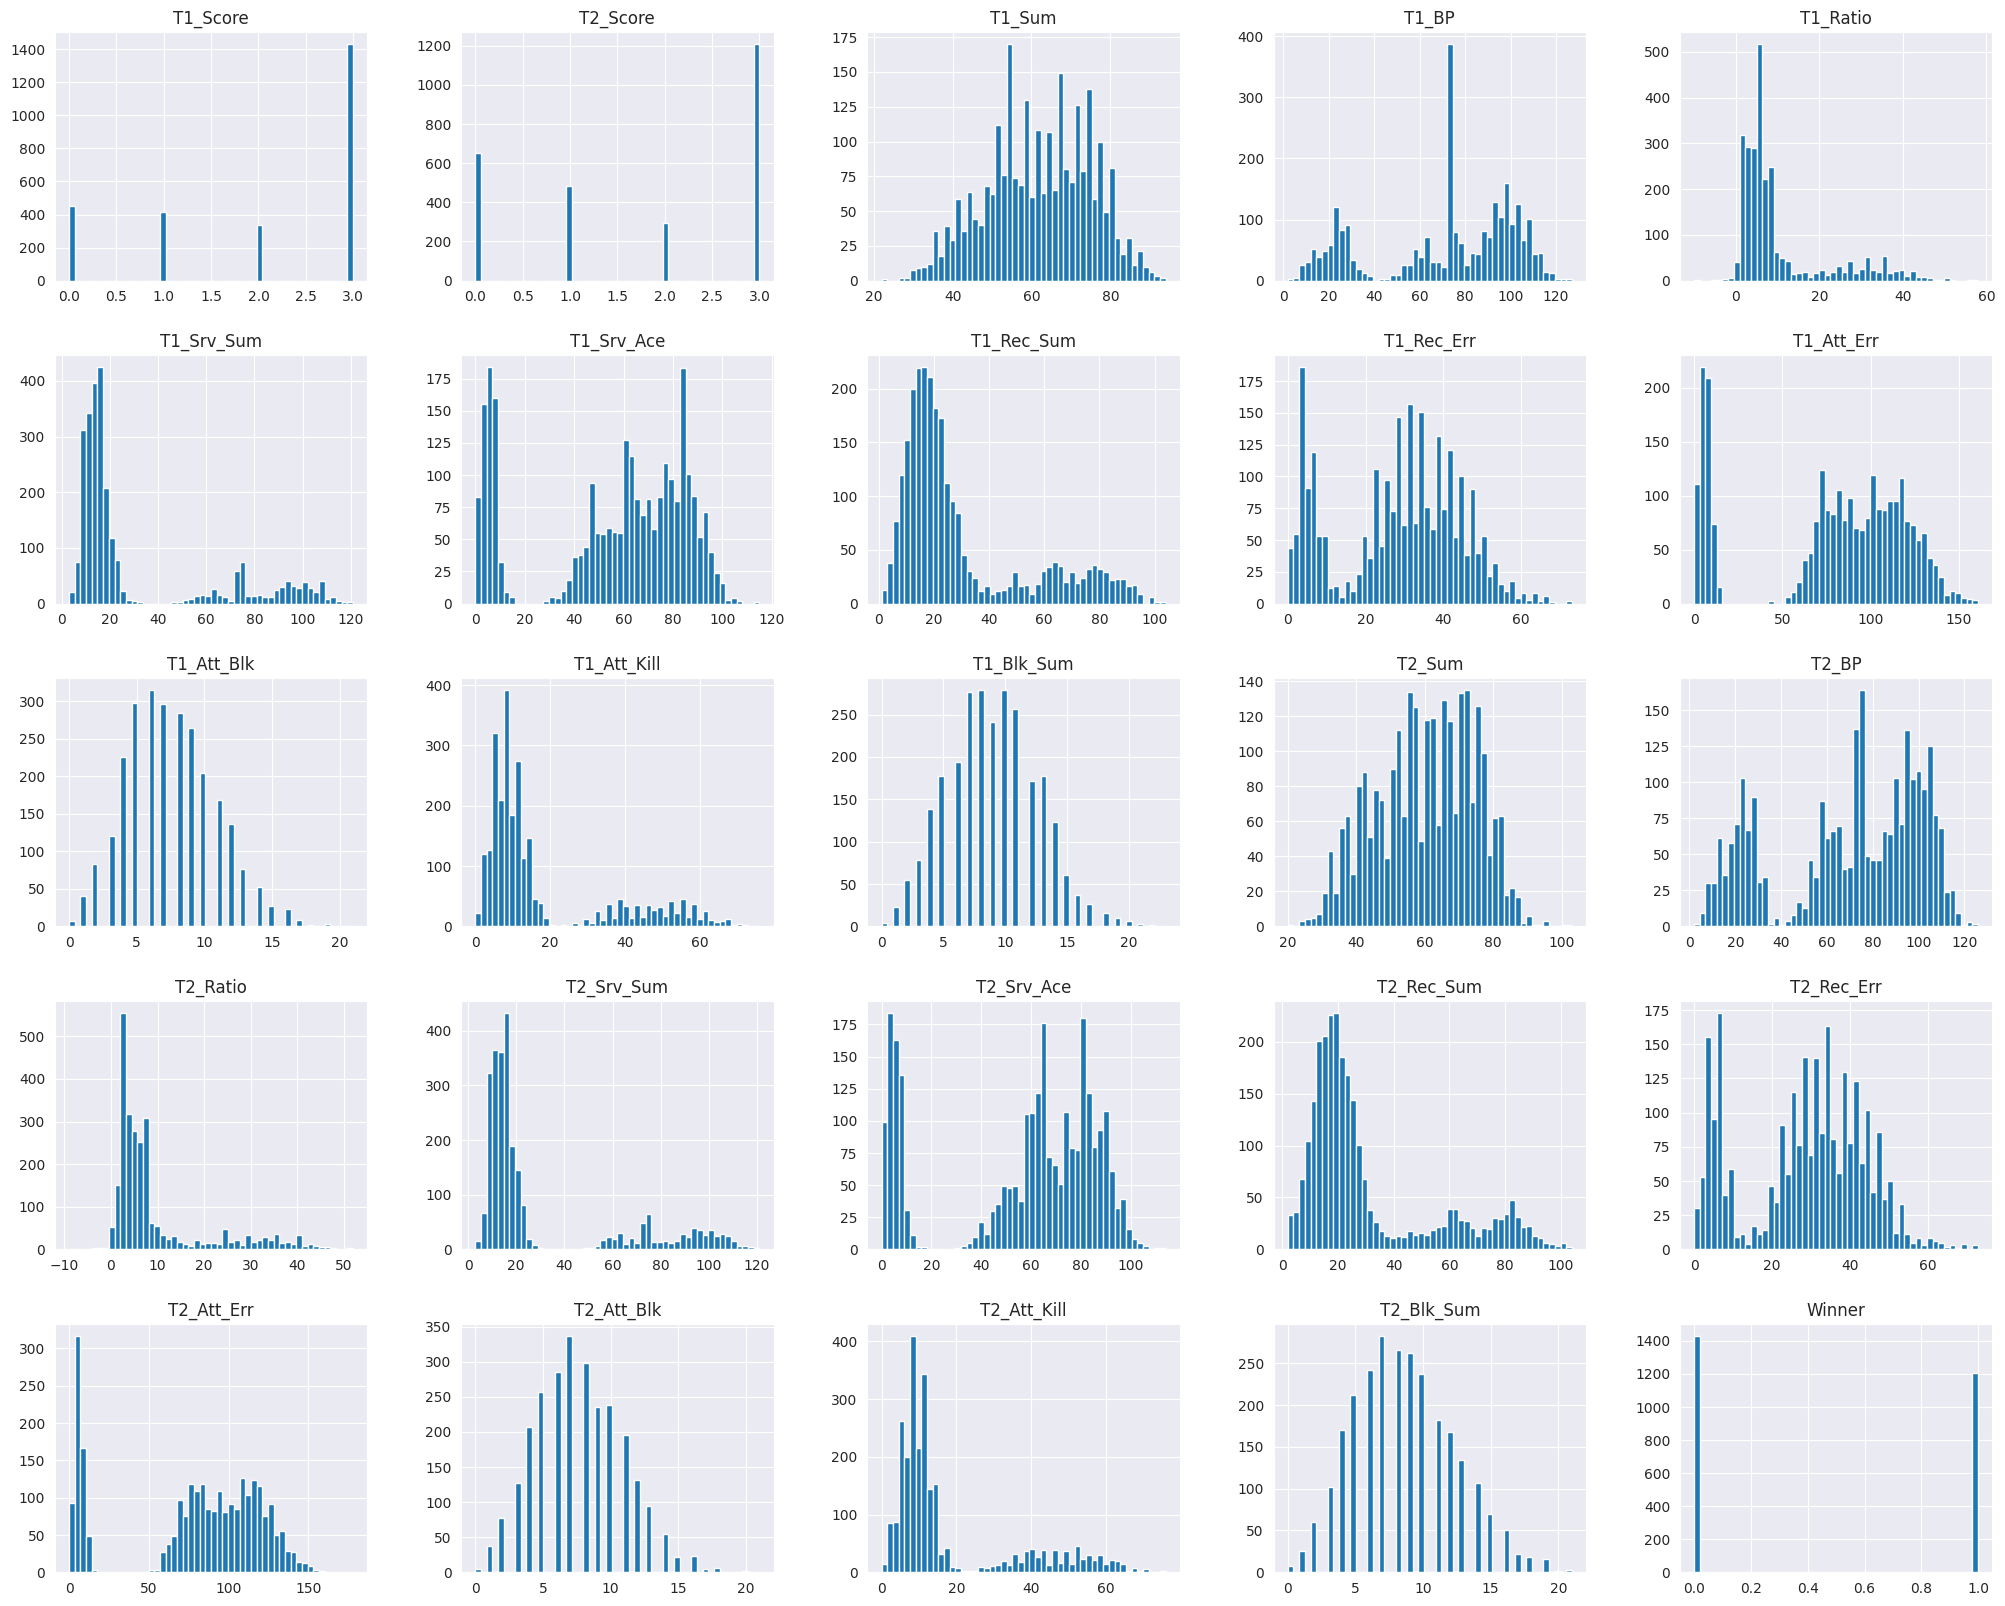

In [7]:
df[numeric_cloumns].hist(bins=50,figsize=(25,20))
plt.show()

<big>Distribution of points for winners


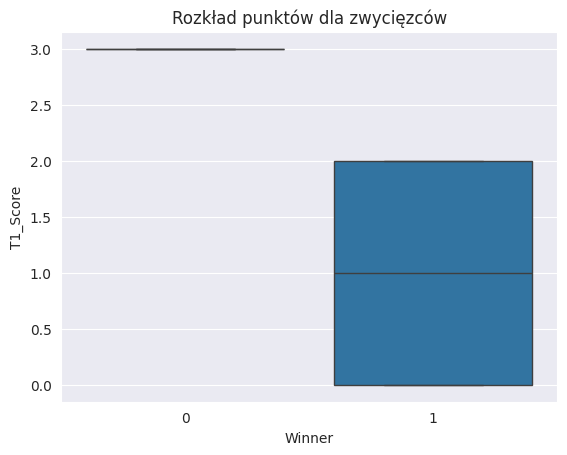

In [10]:
sns.boxplot(data=df, x='Winner',y='T1_Score')
plt.title("Rozkład punktów dla zwycięzców")
plt.show()

<big>Correlation matrix<big>

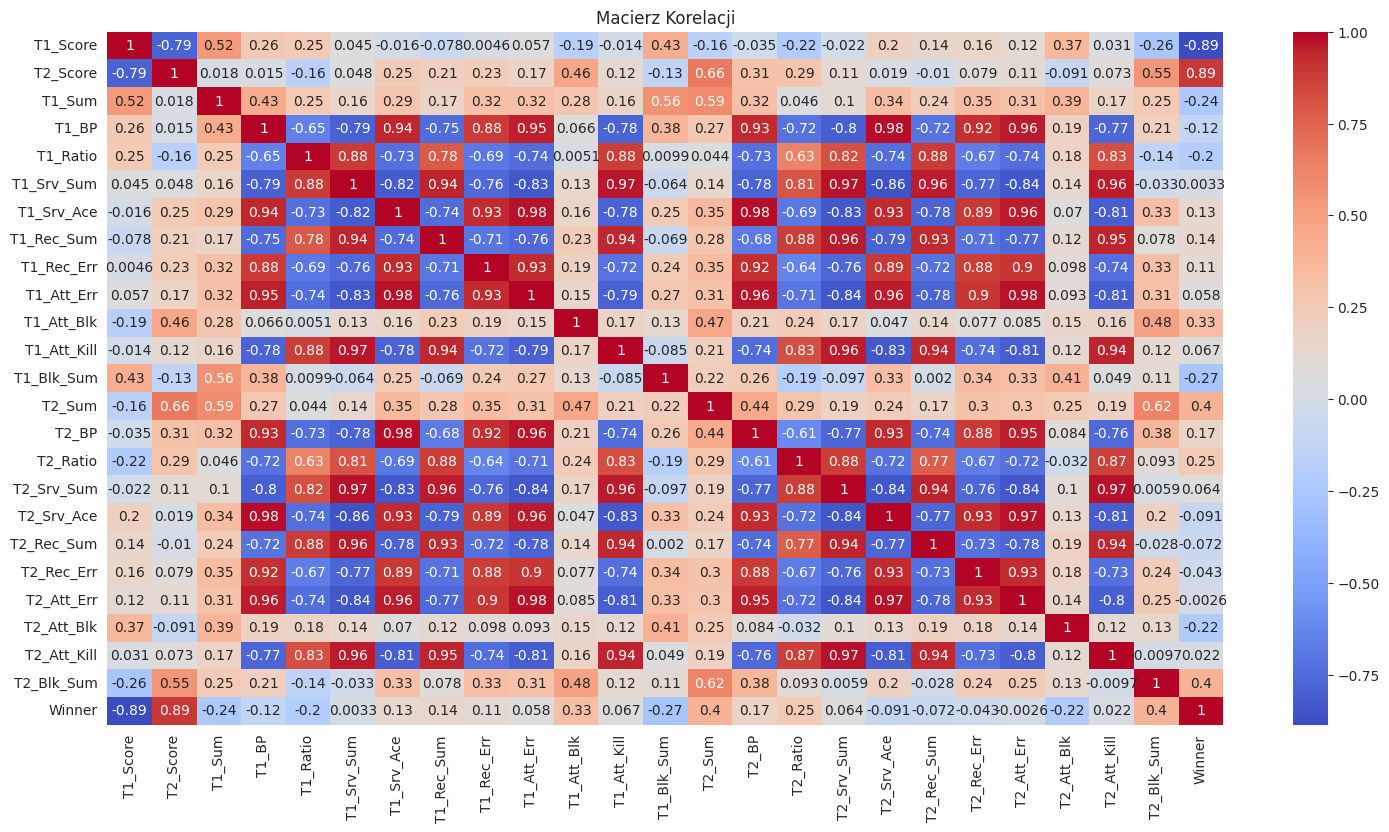

In [16]:
plt.figure(figsize=(18, 9))
corr_matrix = df[numeric_cloumns].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Macierz Korelacji")
plt.show()